# Audio Processing Demo

## Set-up

### Load modules

In [39]:
import os # module for interacting with files and folders
from audio_processing import *
from audio_display import *
from array_manipulation import *
from load_audio import *
from feature_normalize import *

### Load Audio Files

In [40]:
paths = [r'sound/American-English/Narrative',
        r'sound/American-English/Consonants',
        r'sound/American-English/Vowels',
        r'sound/Non-speech']

out_path = 'sound/out/'

fns,audio_data = load_audio(paths_list=paths,pad=0.1)

narrative_fns,consonants_fns,vowels_fns,nonspeech_fns = fns
narrative_data,consonants_data,vowels_data,nonspeech_data = audio_data



## Test of Audio Processing

### Load an audio file

In [41]:
clip_fn = narrative_fns[2]
out_path = 'sound/out/'
clip_data = process_audio(clip_fn,dur=1.2,pad=0,n_mfcc_list=[5,12,36])

### Export Audio

In [42]:
export_audio(out_path+"clip.wav",clip_data)
Audio(out_path+"clip.wav")

In [43]:
export_audio(out_path+"clip_from_fourier.wav",clip_data,format='fourier')
Audio(out_path+"clip_from_fourier.wav")

In [44]:
n_mfcc = 36
export_audio(out_path+"clip_from_mfcc"+str(n_mfcc)+".wav",clip_data,format='mfcc',n_mfcc=n_mfcc)
Audio(out_path+"clip_from_mfcc"+str(n_mfcc)+".wav")

### Display audio data

#### Spectrogram

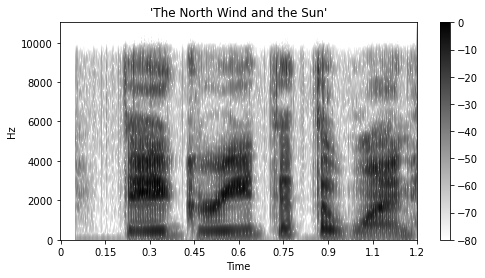

In [45]:
show_the_spectrogram(clip_data, title="\'The North Wind and the Sun\'")

#### MFCCs

22050


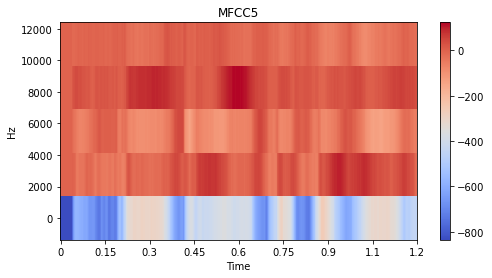

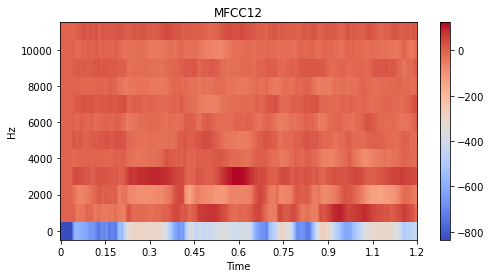

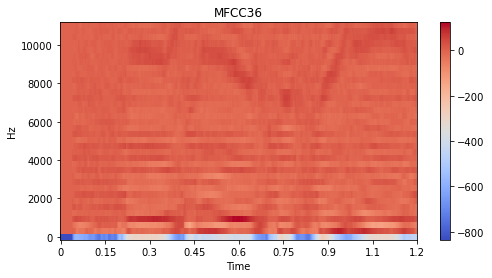

In [46]:
sr = clip_data["sr"]
print(sr)
for n in clip_data["mfcc_ns"]:
  mfcc = clip_data["mfcc"][str(n)]
  title='MFCC'+str(n)
  plot_mfcc(mfcc,sr,title=title)

### Compare Normalization Methods

#### Load an audio file

In [47]:
clip_fn = narrative_fns[1]
out_path = 'sound/out/'
clip_data = process_audio(clip_fn,dur=1.2,n_mfcc_list=[5,12,24,36],pad=0.2)

In [48]:
mfcc_n = 36

#### Load Scalers

(36, 28644)


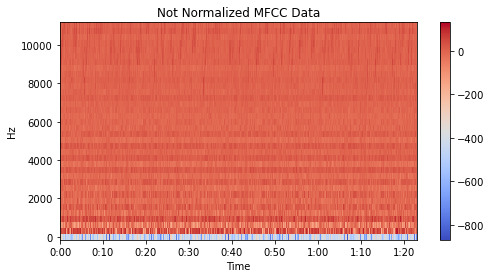

In [49]:
narr = get_narr(narrative_fns,mfcc_n = mfcc_n,pad=0)
print(narr.shape)
sr = narrative_data[0]["sr"]
plot_mfcc(narr,sr=sr,title="Not Normalized MFCC Data")
scaler_dict = {}
for method in ['standard','minmax','maxabs','robust','power','quantile','gaussian','normal']:
    scaler_dict[method] = get_hor_scaler(narr,scaler_type=method)

#### Normed MFCCs

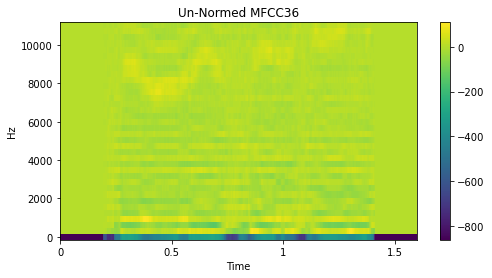

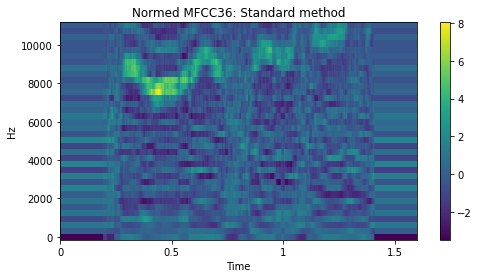

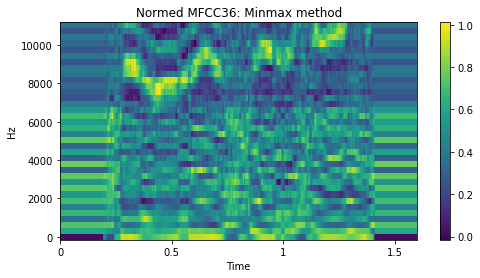

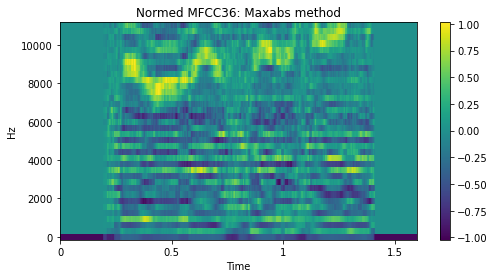

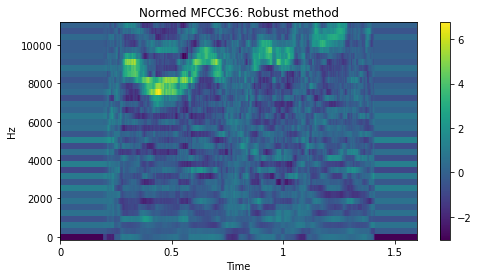

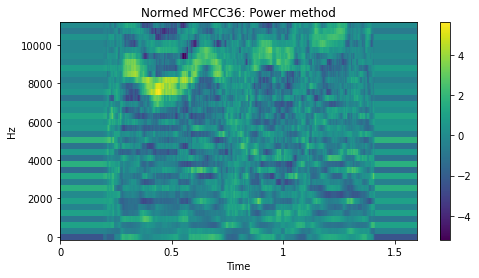

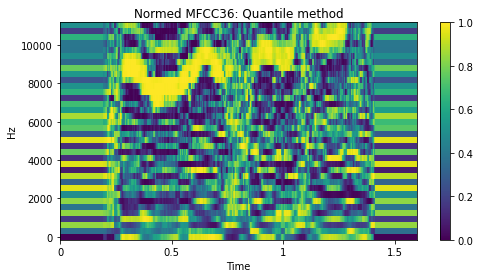

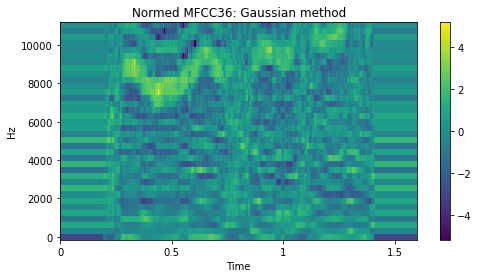

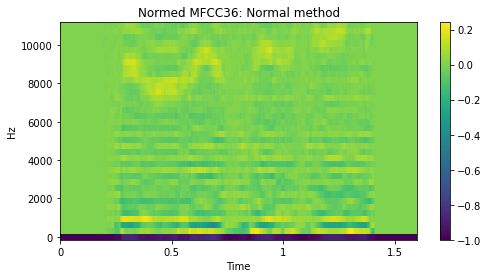

In [50]:
color = None

sr = clip_data["sr"]
mfcc = clip_data["mfcc"][str(mfcc_n)]
title='Un-Normed MFCC'+str(mfcc_n)
plot_mfcc(mfcc,sr,title=title,color=color)

for method in ['standard','minmax','maxabs','robust','power','quantile','gaussian','normal']:
  normed_mfcc = norm_array_hor(mfcc,scaler_dict[method])
  title='Normed MFCC'+str(mfcc_n)+": "+method.title()+" method"
  plot_mfcc(normed_mfcc,sr,title=title,color=color)